# Brands Sentiment 

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
# from plotnine import *
import re
import datetime 

import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\hs324\\OneDrive\\Desktop\\Class_Files\\06_2022Fall\\04_Practicum\\Quantilope_Core\\data\\sentiment_score_text.csv',index_col=[0] )
df.head()

,roberta_neg,roberta_neu,roberta_pos,text
0,0.029508,0.537855,0.432637,@ShaneDaleAZ Totally. The Nike uniforms since ...
1,0.071209,0.369753,0.559038,Hats off to Tom Sachs and the marketing team a...
2,0.002428,0.077772,0.919799,The look on @makiracook face! 😂 \n\nThanks @Ni...
3,0.041717,0.864787,0.093497,Check out my new pickup from Nike⁠ SNKRS: http...
4,0.001843,0.033002,0.965156,@jameslfreelance @Jumpman23 @Nike @nikestore O...


In [3]:
# Since the sentiments adds up to 1, only need to choose the highest as the sentiment of this text. 
df.rename(columns = {'roberta_neg':'neg','roberta_neu':'neu','roberta_pos':'pos' },inplace = True )
df['sentiment'] = df[['neg','neu','pos']].idxmax(axis=1)
df

,neg,neu,pos,text,sentiment
0,0.029508,0.537855,0.432637,@ShaneDaleAZ Totally. The Nike uniforms since ...,neu
1,0.071209,0.369753,0.559038,Hats off to Tom Sachs and the marketing team a...,pos
2,0.002428,0.077772,0.919799,The look on @makiracook face! 😂 \n\nThanks @Ni...,pos
3,0.041717,0.864787,0.093497,Check out my new pickup from Nike⁠ SNKRS: http...,neu
4,0.001843,0.033002,0.965156,@jameslfreelance @Jumpman23 @Nike @nikestore O...,pos
...,...,...,...,...,...
11643,0.283802,0.640393,0.075805,"Armpit musty, Reebok crusty https://t.co/KjJ3z...",neu
11644,0.018777,0.809956,0.171267,@DoubleOhNegatve I believe that was the Reebok...,neu
11645,0.253581,0.710993,0.035426,If you ever find yourself talking shit on will...,neu
11646,0.046945,0.874524,0.078531,"Think the 4,5 shoes gon be Reebok, Doc’s and s...",neu


In [4]:
brands = ['Nike','Adidas','New Balance','Converse','Reebok']

In [5]:
for brand in brands:
    print(brand + ":" + str(df[df['text'].str.contains(brand, case = False, na = False)].shape[0]))

Nike:8069
Adidas:2650
New Balance:54
Converse:948
Reebok:341


In [6]:
# create column with brand names 
for brand in brands:
    df.loc[lambda x : x.text.str.lower().str.contains(brand.lower()), 'brand'] = brand.capitalize()
df 

,neg,neu,pos,text,sentiment,brand
0,0.029508,0.537855,0.432637,@ShaneDaleAZ Totally. The Nike uniforms since ...,neu,Nike
1,0.071209,0.369753,0.559038,Hats off to Tom Sachs and the marketing team a...,pos,Nike
2,0.002428,0.077772,0.919799,The look on @makiracook face! 😂 \n\nThanks @Ni...,pos,Nike
3,0.041717,0.864787,0.093497,Check out my new pickup from Nike⁠ SNKRS: http...,neu,Nike
4,0.001843,0.033002,0.965156,@jameslfreelance @Jumpman23 @Nike @nikestore O...,pos,Nike
...,...,...,...,...,...,...
11643,0.283802,0.640393,0.075805,"Armpit musty, Reebok crusty https://t.co/KjJ3z...",neu,Reebok
11644,0.018777,0.809956,0.171267,@DoubleOhNegatve I believe that was the Reebok...,neu,Reebok
11645,0.253581,0.710993,0.035426,If you ever find yourself talking shit on will...,neu,Reebok
11646,0.046945,0.874524,0.078531,"Think the 4,5 shoes gon be Reebok, Doc’s and s...",neu,Reebok


In [7]:
df['brand'].value_counts()

Nike           7383
Adidas         2506
Converse        944
Reebok          341
New balance      46
Name: brand, dtype: int64

In [8]:
# group by brand and sentiment 
brand_sentiment = df.groupby(['brand','sentiment'])['text'].count()
brand_sentiment = brand_sentiment.groupby(level=0).apply(lambda X: 100 * X / float(X.sum())).reset_index().rename(columns = {'text': 'percentage'})
brand_sentiment 

,brand,sentiment,percentage
0,Adidas,neg,13.008779
1,Adidas,neu,66.759777
2,Adidas,pos,20.231445
3,Converse,neg,18.326271
4,Converse,neu,59.216102
5,Converse,pos,22.457627
6,New balance,neg,10.869565
7,New balance,neu,65.217391
8,New balance,pos,23.913043
9,Nike,neg,13.774888


In [9]:
# most positive 
brand_sentiment[brand_sentiment['sentiment'] == 'pos'].sort_values(by = 'percentage', ascending = False)

,brand,sentiment,percentage
8,New balance,pos,23.913043
5,Converse,pos,22.457627
11,Nike,pos,20.926453
2,Adidas,pos,20.231445
14,Reebok,pos,10.850440


In [10]:
# most negative 
brand_sentiment[brand_sentiment['sentiment'] == 'neg'].sort_values(by = 'percentage', ascending = False)

,brand,sentiment,percentage
3,Converse,neg,18.326271
9,Nike,neg,13.774888
0,Adidas,neg,13.008779
6,New balance,neg,10.869565
12,Reebok,neg,5.278592


## Brand Sentiment Over Time 

In [11]:
time = pd.read_csv('C:\\Users\\hs324\\OneDrive\\Desktop\\Class_Files\\06_2022Fall\\04_Practicum\\Quantilope_Core\\data\\five_brands_text.csv',index_col=[0] )
time= time[['text','created_at','retweets','likes']].reset_index().drop(columns = 'author_id')
time.head()

,text,created_at,retweets,likes
0,@ShaneDaleAZ Totally. The Nike uniforms since ...,2022-09-30 23:46:59+00:00,0,0
1,Hats off to Tom Sachs and the marketing team a...,2022-09-30 23:43:45+00:00,0,0
2,The look on @makiracook face! 😂 \n\nThanks @Ni...,2022-09-30 23:38:15+00:00,1,27
3,Check out my new pickup from Nike⁠ SNKRS: http...,2022-09-30 23:35:28+00:00,0,0
4,@jameslfreelance @Jumpman23 @Nike @nikestore O...,2022-09-30 23:15:57+00:00,0,2


In [33]:
# merge the three columns back to the df 
df_time = df.merge(time, how = 'inner', on= 'text')

# only keep the date 
df_time['created_at']= pd.to_datetime(df_time['created_at']).dt.date

df_time

,neg,neu,pos,text,sentiment,brand,created_at,retweets,likes
0,0.029508,0.537855,0.432637,@ShaneDaleAZ Totally. The Nike uniforms since ...,neu,Nike,2022-09-30,0,0
1,0.071209,0.369753,0.559038,Hats off to Tom Sachs and the marketing team a...,pos,Nike,2022-09-30,0,0
2,0.002428,0.077772,0.919799,The look on @makiracook face! 😂 \n\nThanks @Ni...,pos,Nike,2022-09-30,1,27
3,0.041717,0.864787,0.093497,Check out my new pickup from Nike⁠ SNKRS: http...,neu,Nike,2022-09-30,0,0
4,0.001843,0.033002,0.965156,@jameslfreelance @Jumpman23 @Nike @nikestore O...,pos,Nike,2022-09-30,0,2
...,...,...,...,...,...,...,...,...,...
12547,0.283802,0.640393,0.075805,"Armpit musty, Reebok crusty https://t.co/KjJ3z...",neu,Reebok,2022-08-02,0,1
12548,0.018777,0.809956,0.171267,@DoubleOhNegatve I believe that was the Reebok...,neu,Reebok,2022-08-02,0,1
12549,0.253581,0.710993,0.035426,If you ever find yourself talking shit on will...,neu,Reebok,2022-08-02,0,2
12550,0.046945,0.874524,0.078531,"Think the 4,5 shoes gon be Reebok, Doc’s and s...",neu,Reebok,2022-08-01,0,0


In [34]:
# unpivot the original df_time for easier viz 
df_time_unpivot = df_time.melt(id_vars=['text','brand','created_at'], value_vars = ['neg','neu','pos'], 
                               var_name='sentiment', value_name='sentiment_score')# .set_index('created_at')

df_time_unpivot

,text,brand,created_at,sentiment,sentiment_score
0,@ShaneDaleAZ Totally. The Nike uniforms since ...,Nike,2022-09-30,neg,0.029508
1,Hats off to Tom Sachs and the marketing team a...,Nike,2022-09-30,neg,0.071209
2,The look on @makiracook face! 😂 \n\nThanks @Ni...,Nike,2022-09-30,neg,0.002428
3,Check out my new pickup from Nike⁠ SNKRS: http...,Nike,2022-09-30,neg,0.041717
4,@jameslfreelance @Jumpman23 @Nike @nikestore O...,Nike,2022-09-30,neg,0.001843
...,...,...,...,...,...
37651,"Armpit musty, Reebok crusty https://t.co/KjJ3z...",Reebok,2022-08-02,pos,0.075805
37652,@DoubleOhNegatve I believe that was the Reebok...,Reebok,2022-08-02,pos,0.171267
37653,If you ever find yourself talking shit on will...,Reebok,2022-08-02,pos,0.035426
37654,"Think the 4,5 shoes gon be Reebok, Doc’s and s...",Reebok,2022-08-01,pos,0.078531


In [13]:
# viz using plotly.express
import plotly.graph_objs as go
from datetime import datetime
import plotly.express as px
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import plotly.io as pio
pio.renderers.default = "vscode"

Seaborn relplot reference : [Link](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

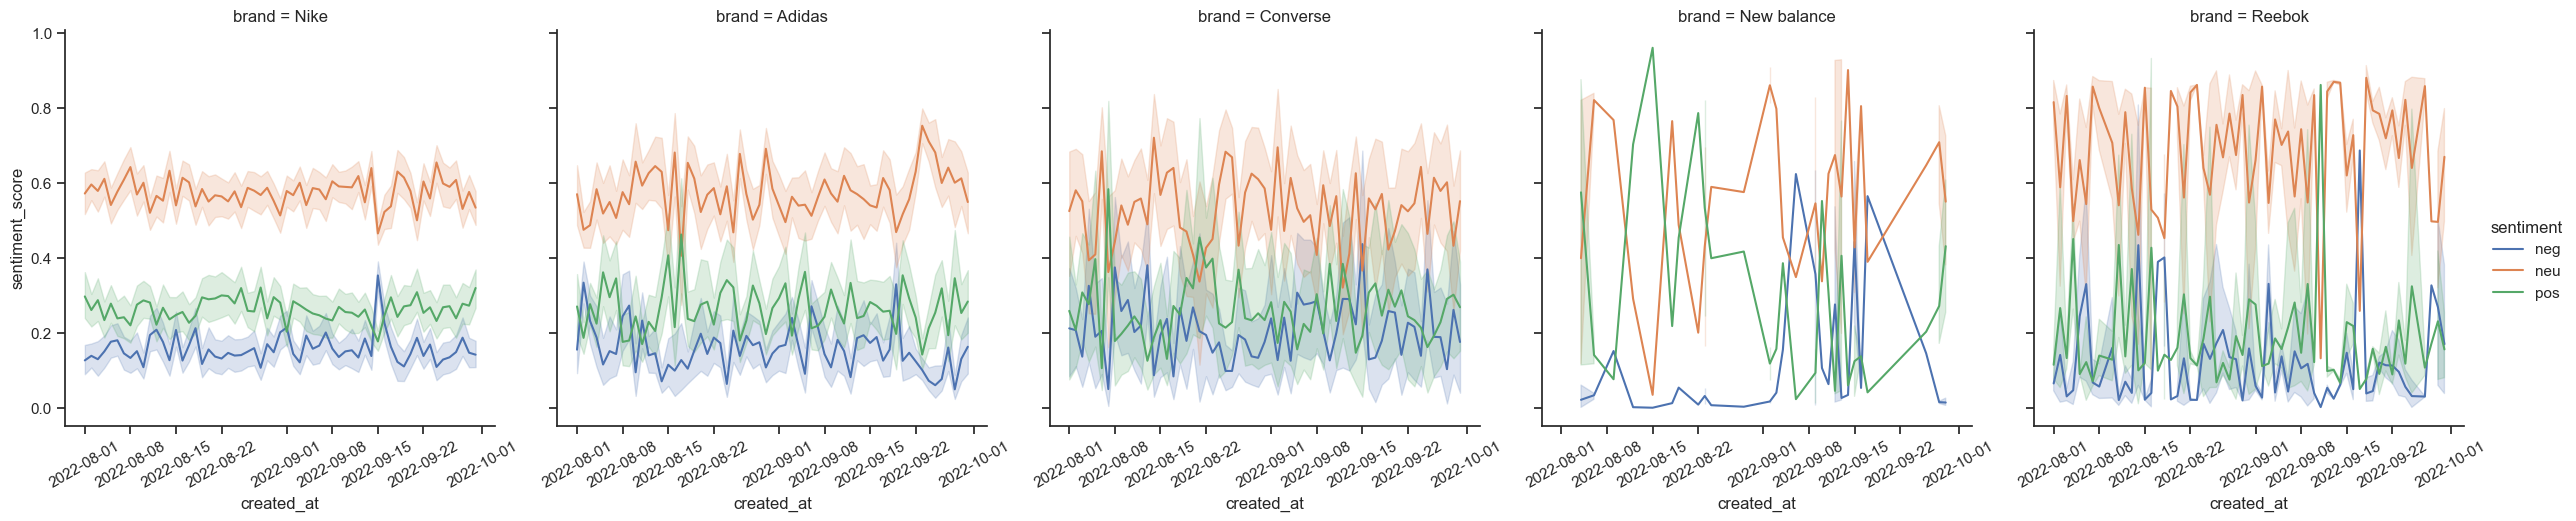

In [41]:
g = sns.relplot(
    data=df_time_unpivot, x="created_at", y="sentiment_score", col="brand",
    hue="sentiment", kind="line",
)

g.set_xticklabels(rotation=30)